In [227]:
import pandas as pd
import numpy as np

fhand = open('covid19dataexport.csv')

print(fhand)

count = 0
dates = dict()
moveave = dict()
active = 0
died = 0 
recovered = 0
recovered50 = 0
died50 = 0
under50 = ['40-49 years','30-39 years','20-29 years','10-19 years','1-4 years','5-9 years' 'Under 1 year']


for line in fhand:
	line = line.strip('"\n')
	data = line.split('","')
	if line.startswith(','): continue
	if 'Active' in data:
		active += 1
	if 'Died' in data:
		died += 1
	if 'Recovered' in data:
		recovered += 1
	if 'Recovered' in data and any(i in under50 for i in data):
		recovered50 += 1
	if 'Died' in data and any(i in under50 for i in data):
		died50 += 1
	if data[1] not in dates:
		dates[data[1]] = 1
	else:
		dates[data[1]] += 1
	count += 1
	if count > 100000:
		break
fhand.close()
fout = open("casesbydate.txt", 'w')
fout.write("Date, Cases\n")
for key in sorted(dates.keys()):
	#print(key, dates[key])
	a = str(key) + "," + str(dates[key]) + "\n"
	fout.write(a)
fout.close()



print(recovered50)
print(died50)

#print(count)
#cur.close()
#print(type(count))
#plt.bar(list(dates.keys()), dates.values(), color='g')
#plt.show()

most = 0					#find day with most confirmed cases
for key in dates:
	if dates[key] > most:
		most = dates[key]
		day = key

frate = round((died*100/recovered), 2)         #calculate case fatality rate
frate50 = round((died50*100/recovered50), 2)   #calculate case fatality rate people under 50
print('There have been', count, 'confirmed or probable cases in Alberta')
print('There are', active, 'active cases in Alberta')
print('There have been', died , 'deaths in Alberta')
print(recovered, 'cases have recovered in Alberta')
print('current case fatality rate is', frate, '%')
print('current case fatality rate for people under 50 is', frate50, '%')
print('The greatest number of confirmed cases in a give day was', most, 'and occured on', day)



<_io.TextIOWrapper name='covid19dataexport.csv' mode='r' encoding='cp1252'>
26558
10
There have been 51878 confirmed or probable cases in Alberta
There are 14052 active cases in Alberta
There have been 510 deaths in Alberta
37316 cases have recovered in Alberta
current case fatality rate is 1.37 %
current case fatality rate for people under 50 is 0.04 %
The greatest number of confirmed cases in a give day was 1569 and occured on 2020-11-21
2020-03-06       1
2020-03-09       6
2020-03-10       9
2020-03-11       8
2020-03-12       2
              ... 
2020-11-18    1108
2020-11-21    1569
2020-11-22    1529
2020-11-25    1082
2020-11-23    1120
Length: 263, dtype: int64


obj1.index

In [228]:
covid19AB = pd.read_csv('covid19dataexport.csv', index_col = 'Date reported')

In [229]:
del covid19AB['Unnamed: 0']

In [230]:
covid19AB

,Alberta Health Services Zone,Gender,Age group,Case status,Case type
Date reported,,,,,
2020-03-06,Calgary Zone,Female,50-59 years,Recovered,Confirmed
2020-03-09,Calgary Zone,Female,30-39 years,Recovered,Confirmed
2020-03-09,Calgary Zone,Male,30-39 years,Recovered,Confirmed
2020-03-09,Edmonton Zone,Male,60-69 years,Recovered,Confirmed
2020-03-09,Edmonton Zone,Male,40-49 years,Recovered,Confirmed
...,...,...,...,...,...
2020-07-18,North Zone,Male,20-29 years,Recovered,Probable
2020-09-17,South Zone,Male,Unknown,Recovered,Probable
2020-09-28,North Zone,Male,Unknown,Recovered,Probable


In [231]:
covid19AB.describe()

,Alberta Health Services Zone,Gender,Age group,Case status,Case type
count,51878,51878,51878,51878,51878
unique,6,3,12,3,2
top,Calgary Zone,Male,30-39 years,Recovered,Confirmed
freq,21474,26154,10081,37316,50598


In [232]:
covid19AB.stack()

Date reported                              
2020-03-06     Alberta Health Services Zone    Calgary Zone
               Gender                                Female
               Age group                        50-59 years
               Case status                        Recovered
               Case type                          Confirmed
                                                   ...     
2020-11-24     Alberta Health Services Zone      North Zone
               Gender                                  Male
               Age group                            Unknown
               Case status                        Recovered
               Case type                           Probable
Length: 259390, dtype: object

In [195]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [58]:
%matplotlib notebook

In [94]:
from datetime import datetime



In [233]:
covidcasesAB = pd.read_csv('casesbydate.txt', index_col = 'Date', parse_dates=True)

In [235]:
covidcasesAB['MA7day'] = covidcasesAB.rolling(window=7).mean()

In [236]:
covidcasesAB['MA30day'] = covidcasesAB.rolling(window=30)[' Cases'].mean()

<IPython.core.display.Javascript object>


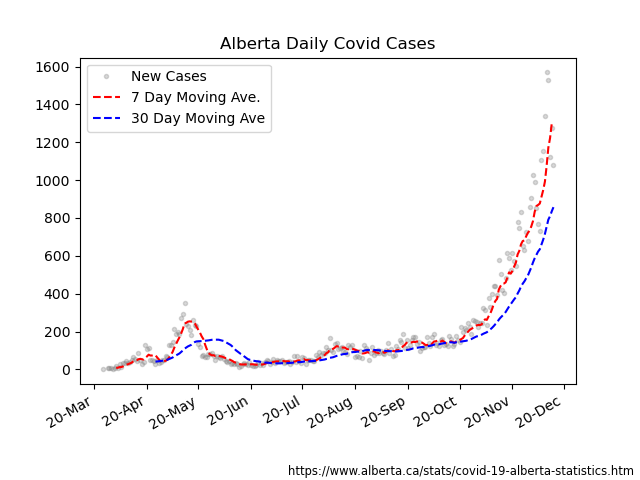

Text(0.99, 0.01, 'https://www.alberta.ca/stats/covid-19-alberta-statistics.htm')

In [271]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,)

ax.plot(covidcasesAB[' Cases'], marker = '.',  color ="grey", alpha = 0.3, linestyle = '', label = 'New Cases')
ax.plot(covidcasesAB['MA7day'], color ="red", linestyle = '--', label = '7 Day Moving Ave.')
ax.plot(covidcasesAB['MA30day'], color ="blue", linestyle = '--', label = '30 Day Moving Ave')

ax.set_title('Alberta Daily Covid Cases')

date_form = mdates.DateFormatter("%y-%b")
ax.xaxis.set_major_formatter(date_form)
fig.autofmt_xdate()

ax.legend(loc='best')

plt.figtext(0.99, 0.01, 'https://www.alberta.ca/stats/covid-19-alberta-statistics.htm', horizontalalignment='right', size = 'small') 

In [247]:
covidcasesAB.tail(10)

,Cases,MA7day,MA30day
Date,,,
2020-11-16,768,868.714286,622.600000
2020-11-17,733,876.285714,634.500000
2020-11-18,1108,912.285714,660.466667
2020-11-19,1153,947.571429,685.700000
2020-11-20,1340,992.000000,715.733333
2020-11-21,1569,1074.428571,753.266667
2020-11-22,1529,1171.428571,791.200000
2020-11-23,1120,1221.714286,809.333333
2020-11-24,1273,1298.857143,834.966667


In [244]:
plt.savefig('fig3.pdf')